<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

spam_df = pd.read_csv(r"Lab 5 Dataset- Emails.csv", encoding="latin1")

<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [15]:
spam_df["v2"] = spam_df["v2"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
spam_df["v2"] = spam_df["v2"].str.strip()

print(spam_df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point crazy Available only in ...        NaN   
1   ham                            Ok lar Joking wif u oni        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham        U dun say so early hor U c already then say        NaN   
4   ham  Nah I dont think he goes to usf he lives aroun...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [16]:
# frac=1 samples the whole dataset but in a random order 
# reorders the dataset
spam_df_shuffled = spam_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into train/validation/test
spam_len = len(spam_df_shuffled)
train_len = int(spam_len * 0.7)
validation_len = int(spam_len * 0.2)

train_data = spam_df_shuffled.iloc[:train_len]
validation_data = spam_df_shuffled.iloc[train_len:train_len+validation_len]
test_data = spam_df_shuffled.iloc[train_len+validation_len:]


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [17]:
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Use default dict to have default value for ease of use
word_counts = defaultdict(lambda: {"#Spam": 0, "#Ham": 0})

for index, row in train_data.iterrows():
    message_type = row["v1"]
    message = row["v2"]
    
    # Preprocess text: remove punctuation, lowercase, and split
    clean_message = re.sub(r'[^a-zA-Z\s]', ' ', message).lower().split()
    
    for word in clean_message:
        # Skip stopwords and single-character words
        if word in stop_words or len(word) < 2:
            continue
            
        if message_type == "spam":
            word_counts[word]["#Spam"] += 1
        else:
            word_counts[word]["#Ham"] += 1

word_freq = pd.DataFrame.from_dict(word_counts, orient="index")
word_freq = word_freq.reset_index().rename(columns={"index": "word"})
word_freq = word_freq[["word", "#Spam", "#Ham"]]

print(word_freq.head())

        word  #Spam  #Ham
0      funny      0     6
1       fact      1     7
2     nobody      0     6
3    teaches      0     4
4  volcanoes      0     1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blacb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



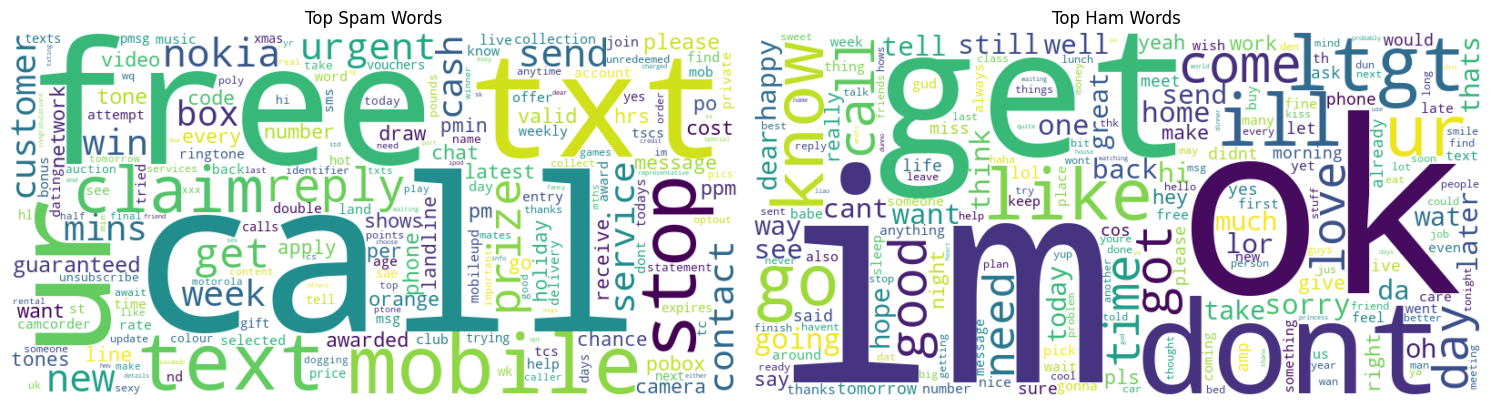

In [18]:
from wordcloud import WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create frequency dictionaries from your existing word_freq DataFrame
spam_freq = dict(zip(word_freq['word'], word_freq['#Spam']))
ham_freq = dict(zip(word_freq['word'], word_freq['#Ham']))

# Generate word clouds
spam_wc = WordCloud(width=800, height=400, background_color="white", max_words=200).generate_from_frequencies(spam_freq)
ham_wc = WordCloud(width=800, height=400, background_color="white", max_words=200).generate_from_frequencies(ham_freq)

# Plot both word clouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Top Spam Words')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation="bilinear")
plt.title('Top Ham Words')
plt.axis("off")

plt.tight_layout()
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [19]:
total_spam = (spam_df_shuffled["v1"] == "spam").sum()
total_ham = (spam_df_shuffled["v1"] == "ham").sum()
k = 0.5

# Copy word, spam and ham column over (needed for later processing)
word_prob = word_freq[['word', "#Spam", "#Ham"]].copy()

word_prob["P_Spam"] = (word_freq["#Spam"] + k) / (total_spam + 2*k)
word_prob["P_Ham"] = (word_freq["#Ham"] + k) / (total_ham + 2*k)

# Make sure the columns are in the correct order
word_prob = word_prob[["word", "P_Spam", "P_Ham", "#Spam", "#Ham"]]

print(word_prob)

           word    P_Spam     P_Ham  #Spam  #Ham
0         funny  0.000668  0.001347      0     6
1          fact  0.002005  0.001554      1     7
2        nobody  0.000668  0.001347      0     6
3       teaches  0.000668  0.000932      0     4
4     volcanoes  0.000668  0.000311      0     1
...         ...       ...       ...    ...   ...
6746     cheery  0.000668  0.000311      0     1
6747   handsome  0.000668  0.000311      0     1
6748    finding  0.000668  0.000311      0     1
6749    yagoing  0.000668  0.000311      0     1
6750    pubcafe  0.000668  0.000311      0     1

[6751 rows x 5 columns]


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [20]:
prior_spam = 0.4
prior_ham = 0.6

def calculate_spam_prob(word):
    prior_spam = 0.4
    prior_ham = 0.6
    
    # Check if word exists in our probability DataFrame
    if word in word_prob['word'].values:
        word_row = word_prob[word_prob['word'] == word].iloc[0]
        prob_e_given_spam = word_row['P_Spam']
        prob_e_given_ham = word_row['P_Ham']
    
    # If not, then the probability would've been 0
    # This would mess up the calculation 
    else:
        k = 0.5
        prob_e_given_spam = k / (total_spam + 2*k)
        prob_e_given_ham = k / (total_ham + 2*k)
    
    # Bayes' theorem calculation
    numerator = prob_e_given_spam * prior_spam
    denominator = numerator + (prob_e_given_ham * prior_ham)
    p_spam_given_e = numerator / denominator
    p_ham_given_e = 1 - p_spam_given_e
    
    return prob_e_given_spam, prob_e_given_ham, p_spam_given_e, p_ham_given_e

word_choice = "free"
results = calculate_spam_prob(word_choice)

print(f"\nWord = ['{word_choice}']")
print(f"P(E|S) = [{results[0]:.8f}]")
print(f"P(E|¬S) = [{results[1]:.8f}]")
print(f"P(S|E) = [{results[2]:.8f}]")
print(f"P(¬S|E) = [{results[3]:.8f}]")


Word = ['free']
P(E|S) = [0.21189840]
P(E|¬S) = [0.00859925]
P(S|E) = [0.94261994]
P(¬S|E) = [0.05738006]


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [21]:
def classify_message(message, word_prob, prior_spam=0.4, prior_ham=0.6):
    
    # Clean the message so that it has no punctuation
    clean_message = re.sub(r'[^a-zA-Z\s]', ' ', message).lower().split()
    
    # Probability arrays
    prob_spam = []
    prob_ham = []
    
    # Get probabilities for known words
    for word in clean_message:

        # Skip word if not in word_prob
        if word in word_prob['word'].values:
            word_data = word_prob[word_prob['word'] == word].iloc[0]
            prob_spam.append(word_data['P_Spam'])
            prob_ham.append(word_data['P_Ham'])
    
    # Calculate products with priors
    spam_score = prior_spam
    ham_score = prior_ham
    
    for probability in prob_spam:
        spam_score *= probability
        
    for probability in prob_ham:
        ham_score *= probability
    
    # Sets classification to whichever one is higher
    classification = "spam" if spam_score > ham_score else "ham"
    
    # Returns dictionary of results
    # Key : array of results
    return {
        'classification': classification,
        'spam_score': spam_score,
        'ham_score': ham_score,
        'prob_spam': prob_spam,
        'prob_ham': prob_ham
    }

test_message = "free prize urgent money"
result = classify_message(test_message, word_prob)

print(f"Message: {test_message}")
print(f"Classification: {result["classification"]}")
print(f"Spam Score: {result["spam_score"]:.10f}")
print(f"Ham Score: {result["ham_score"]:.10f}")
print("\nWord-by-word probabilities:")

# Zip allows us to loop through each word and their probabilities in parallel
# This works as the probabilities are in the same order as the words
for word, p_spam, p_ham in zip(

    # Array of words that exist in word_prob
    [w for w in test_message.split() if w in word_prob['word'].values],
    result['prob_spam'],
    result['prob_ham']
):
    print(f"{word}: P(S|E)={p_spam:.6f}, P(¬S|E)={p_ham:.6f}")

Message: free prize urgent money
Classification: spam
Spam Score: 0.0000024581
Ham Score: 0.0000000000

Word-by-word probabilities:
free: P(S|E)=0.211898, P(¬S|E)=0.008599
prize: P(S|E)=0.095588, P(¬S|E)=0.000104
urgent: P(S|E)=0.064840, P(¬S|E)=0.000311
money: P(S|E)=0.004679, P(¬S|E)=0.007149


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [22]:
import math

def classify_message_log(message, word_prob, prior_spam=0.4, prior_ham=0.6):
    
    # Remove punctuation
    if type(message) != list:
        clean_message = re.sub(r'[^a-zA-Z\s]', ' ', message).lower().split()
    
    log_prob_spam = []
    log_prob_ham = []
    
    # Collect log probabilities for words in word_prob
    for word in clean_message:
        if word in word_prob['word'].values:
            word_data = word_prob[word_prob['word'] == word].iloc[0]
            log_prob_spam.append(math.log(word_data['P_Spam']))
            log_prob_ham.append(math.log(word_data['P_Ham']))
    
    # Calculate log scores with priors
    log_prior_spam = math.log(prior_spam)
    log_prior_ham = math.log(prior_ham)
    
    # We can add all of them together as they are logs
    spam_log_score = log_prior_spam + sum(log_prob_spam)
    ham_log_score = log_prior_ham + sum(log_prob_ham)
    
    # Set classification to whichever one is more probable
    classification = "spam" if spam_log_score > ham_log_score else "ham"
    
    return {
        'classification': classification,
        'spam_log_score': spam_log_score,
        'ham_log_score': ham_log_score,
        'log_prob_spam': log_prob_spam,
        'log_prob_ham': log_prob_ham
    }

test_message = "free prize urgent money"
result = classify_message_log(test_message, word_prob)

print(f"Message: '{test_message}'")
print(f"Classification: {result['classification']}")
print(f"Spam Log Score: {result['spam_log_score']:.4f}")
print(f"Ham Log Score: {result['ham_log_score']:.4f}")
print("\nWord-by-word log probabilities:")

# Use zip to iterate in parallel
for word, log_p_spam, log_p_ham in zip(
    [w for w in test_message.split() if w in word_prob['word'].values],
    result['log_prob_spam'],
    result['log_prob_ham']
):
    print(f"{word}: logP(S|E)={log_p_spam:.4f}, logP(¬S|E)={log_p_ham:.4f}")

Message: 'free prize urgent money'
Classification: spam
Spam Log Score: -12.9161
Ham Log Score: -27.4589

Word-by-word log probabilities:
free: logP(S|E)=-1.5516, logP(¬S|E)=-4.7561
prize: logP(S|E)=-2.3477, logP(¬S|E)=-9.1749
urgent: logP(S|E)=-2.7358, logP(¬S|E)=-8.0763
money: logP(S|E)=-5.3646, logP(¬S|E)=-4.9408


<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [23]:
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

for index, row in test_data.iterrows():
    label = row["v1"]
    message = row["v2"]

    result = classify_message_log(message, word_prob)
    predicted_label = result["classification"]

    if label == "spam" and predicted_label == "spam":
        match_spam += 1
    else:
        thought_spam_is_ham += 1
    
    if label == "ham" and predicted_label == "ham":
        match_ham += 1
    else:
        thought_ham_is_spam += 1

total_messages = len(test_data)
accuracy = (match_spam + match_ham) / total_messages

print(f"match_spam {match_spam}")
print(f"match_ham {match_ham}")
print(f"thought_ham_is_spam {thought_ham_is_spam}")
print(f"thought_spam_is_ham {thought_spam_is_ham}")
print(f"Accuracy: {accuracy}")

match_spam 72
match_ham 405
thought_ham_is_spam 153
thought_spam_is_ham 486
Accuracy: 0.8548387096774194


<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

In [24]:
# I will try 3 different sets to see the performance of the model:
# 1.) Using top 100 spam words
# 2.) Using top 100 ham words
# 3.) Using top 100 frequent words

total_word_prob = len(word_prob)

# Top 100 frequent words:
# Finds the total count of the word
word_prob["total_count"] = word_prob["#Spam"] + word_prob["#Ham"]
top_100_freq = word_prob.sort_values("total_count", ascending=False).head(100)["word"].tolist()

# Top 100 spam words
# Add small number to avoid division by zero, laplace
word_prob["spam_ratio"] = word_prob["#Spam"] / (word_prob["total_count"] + 0.00001)
top_spam_ratio = word_prob.sort_values("spam_ratio", ascending=False).head(100)["word"].tolist()

# Top 100 ham words
word_prob["ham_ratio"] = word_prob["#Ham"] / (word_prob["total_count"] + 0.00001)
top_ham_ratio = word_prob.sort_values("ham_ratio", ascending=False).head(100)["word"].tolist()

def evaluate_subset(subset, dataset):
    match_spam = 0
    match_ham = 0
    thought_ham_is_spam = 0
    thought_spam_is_ham = 0

    for index, row in dataset.iterrows():
        label = row["v1"]
        message = row["v2"]

        # Only uses words in subset this time
        result = classify_message_log(message=message, word_prob=word_prob[word_prob["word"].isin(subset)])
        predicted_label = result["classification"]

        if label == "spam" and predicted_label == "spam":
            match_spam += 1
        else:
            thought_spam_is_ham += 1
        
        if label == "ham" and predicted_label == "ham":
            match_ham += 1
        else:
            thought_ham_is_spam += 1
    
    accuracy = (match_spam + match_ham) / len(dataset)
    return accuracy


evaluated_top_100_freq = [evaluate_subset(top_100_freq, validation_data), "frequency"]
evaluated_top_100_spam = [evaluate_subset(top_spam_ratio, validation_data), "top spam"]
evaluated_top_100_ham = [evaluate_subset(top_ham_ratio, validation_data), "top ham"]

best_subset = max(evaluated_top_100_freq, max(evaluated_top_100_ham, evaluated_top_100_spam))

print(f"The best subset was the one that targetted: {best_subset[1]}")
print(f"It had an accuracy of: {best_subset[0]:.6f}")

The best subset was the one that targetted: top spam
It had an accuracy of: 0.964991


<h3></h3>